<a href="https://colab.research.google.com/github/faro7ah/LogesticRegression_ML/blob/main/weekend_project_ML1_case_study_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Week 1 Case Study
[Customer churn](https://en.wikipedia.org/wiki/Churn_rate) - Predict customer retention. 

### Data
- [churn_data.csv](https://raw.githubusercontent.com/gumdropsteve/intro_to_machine_learning/main/day_05/data/churn_data.csv)
- [Data Dictionary](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)

### Deleverables
1. Analysis of customer data
    - EDA, data viz, etc...
2. Model to predict churn 
    - Classification - LogisticRegression
    - How good is you model?
        - precision, recall, etc...
    - What are the best params?
        - GridSearchCV, etc...
3. Ideas for customer retention programs


---

---





# Introduction:
Each row represents a customer, each column contains the customer's attributes described on the column Metadata.
The data set includes information about:
Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents


In [317]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
import numpy as np 
import seaborn as sns
from sklearn.metrics import*
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

raw_link = 'https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv'
#read csv file
df = pd.read_csv(raw_link)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6333,5119-KEPFY,Male,0,Yes,No,36,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),95.00,3440.25,No
6334,6923-JHPMP,Female,0,No,No,2,Yes,No,Fiber optic,Yes,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,80.45,137.1,No
6335,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
6336,4098-NAUKP,Male,1,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,84.65,5683.6,No


## Displaying Data:


---

---







In [318]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,Yes
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,No
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,No
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,No
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,No


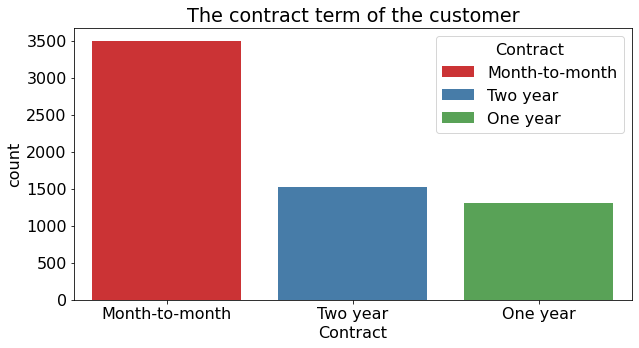

In [319]:
plt.figure( figsize=[10,5] )
sns.countplot(x='Contract',data= df, hue='Contract' , palette="Set1", dodge=False).set_title("The contract term of the customer");


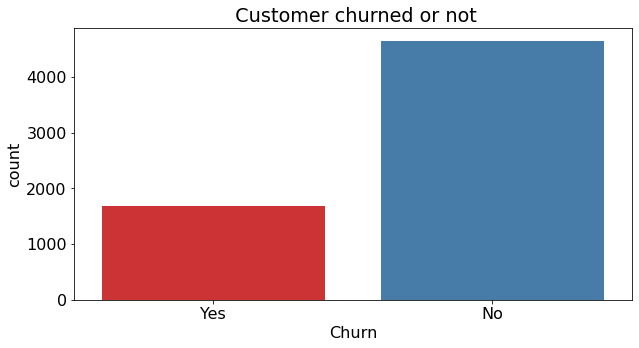

In [320]:
plt.figure( figsize=[10,5] )
sns.countplot(x='Churn' ,data= df, palette="Set1").set_title(" Customer churned or not");

# Data Wrangling:
**In this part we make some steps to prepare the data for modeling:**

- ```Map()``` function to convert  ``` Churn ``` column into 1 and 0 which yes and No represent:1 and 0 rescpectivaly.

- We create array for catecorical ``` ['PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'Contract','TechSupport','StreamingTV','StreamingMovies'] ``` ,and used ```OneHotEncoder()``` function to dealing with dummy variables.

- We concat categorical columns after convert it to dummy variables with main DataFarame.

- We convert ```TotalCharges``` from object to float.

- We used ```fillna()``` to fill NaN values with mean.







---

---















In [321]:
#map function to convert yes and no
df['Churn']= df['Churn'].map({'Yes':1, 'No':0}).astype(int)


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        6338 non-null   object 
 1   gender            6338 non-null   object 
 2   SeniorCitizen     6338 non-null   int64  
 3   Partner           6338 non-null   object 
 4   Dependents        6338 non-null   object 
 5   tenure            6338 non-null   int64  
 6   PhoneService      6338 non-null   object 
 7   MultipleLines     6338 non-null   object 
 8   InternetService   6338 non-null   object 
 9   OnlineSecurity    6338 non-null   object 
 10  OnlineBackup      6338 non-null   object 
 11  DeviceProtection  6338 non-null   object 
 12  TechSupport       6338 non-null   object 
 13  StreamingTV       6338 non-null   object 
 14  StreamingMovies   6338 non-null   object 
 15  Contract          6338 non-null   object 
 16  PaperlessBilling  6338 non-null   object 


In [323]:
#check for unique values
df.PaymentMethod.unique()

array(['Electronic check', 'Credit card (automatic)', 'Mailed check',
       'Bank transfer (automatic)'], dtype=object)

In [324]:
#check for unique values
df.Contract.unique()

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [325]:
#Make a OneHoteEncoder
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder()

col_names = ['PhoneService', 'MultipleLines',
                  'OnlineSecurity', 'OnlineBackup', 'Contract', 'TechSupport',
                  'StreamingTV','StreamingMovies']

# One Hot encode the column
one_hot_df = one_hot.fit_transform(df[col_names]).toarray()

In [326]:
# Look at the categories
one_hot.categories_

[array(['No', 'Yes'], dtype=object),
 array(['No', 'No phone service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object),
 array(['No', 'No internet service', 'Yes'], dtype=object)]

In [327]:
#For loop to determined categoricals columns' name
column_names = []

# for x in range(len(col_names)):
for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        # print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])

column_names

['PhoneService_No',
 'PhoneService_Yes',
 'MultipleLines_No',
 'MultipleLines_No phone service',
 'MultipleLines_Yes',
 'OnlineSecurity_No',
 'OnlineSecurity_No internet service',
 'OnlineSecurity_Yes',
 'OnlineBackup_No',
 'OnlineBackup_No internet service',
 'OnlineBackup_Yes',
 'Contract_Month-to-month',
 'Contract_One year',
 'Contract_Two year',
 'TechSupport_No',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'StreamingTV_No',
 'StreamingTV_No internet service',
 'StreamingTV_Yes',
 'StreamingMovies_No',
 'StreamingMovies_No internet service',
 'StreamingMovies_Yes']

In [328]:
# Values for each row
one_hot_df

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.]])

Concat categorical column into main DataFrame

In [329]:
# add to original dataframe
df_new = pd.concat(
    [df,
     pd.DataFrame(one_hot_df, columns=column_names)],
      axis=1)

df_new.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes
0,5087-SUURX,Female,0,Yes,No,18,No,No phone service,DSL,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check,39.05,669.85,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1764-VUUMT,Male,0,No,Yes,66,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,1269.1,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0089-IIQKO,Female,0,Yes,Yes,39,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),99.95,3767.4,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1960-UYCNN,Male,0,No,No,10,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,95.25,1021.55,0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,8224-IVVPA,Female,0,No,No,27,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,56.70,1652.95,0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


conver ```TotalCharges``` column from object to float datatype


In [330]:
df_new['TotalCharges'] = df_new['TotalCharges'].apply(pd.to_numeric, errors='coerce')

In [331]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6338 entries, 0 to 6337
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customerID                           6338 non-null   object 
 1   gender                               6338 non-null   object 
 2   SeniorCitizen                        6338 non-null   int64  
 3   Partner                              6338 non-null   object 
 4   Dependents                           6338 non-null   object 
 5   tenure                               6338 non-null   int64  
 6   PhoneService                         6338 non-null   object 
 7   MultipleLines                        6338 non-null   object 
 8   InternetService                      6338 non-null   object 
 9   OnlineSecurity                       6338 non-null   object 
 10  OnlineBackup                         6338 non-null   object 
 11  DeviceProtection              

In [332]:
#fill NaN with the mean
df_new['TotalCharges'].fillna(value=df_new['TotalCharges'].mean(), inplace=True)

In [333]:
#check for null values
df_new.isnull().sum()

customerID                             0
gender                                 0
SeniorCitizen                          0
Partner                                0
Dependents                             0
tenure                                 0
PhoneService                           0
MultipleLines                          0
InternetService                        0
OnlineSecurity                         0
OnlineBackup                           0
DeviceProtection                       0
TechSupport                            0
StreamingTV                            0
StreamingMovies                        0
Contract                               0
PaperlessBilling                       0
PaymentMethod                          0
MonthlyCharges                         0
TotalCharges                           0
Churn                                  0
PhoneService_No                        0
PhoneService_Yes                       0
MultipleLines_No                       0
MultipleLines_No

# Logistic Regression Model: 




Logistic regression (LR) is a statistical method similar to linear regression since LR finds an equation that predicts an outcome for a binary variable, Y, from one or more response variables, X. However, unlike linear regression the response variables can be categorical or continuous, as the model does not strictly require continuous data. To predict group membership, LR uses the log odds ratio rather than probabilities and an iterative maximum likelihood method rather than a least squares to fit the final model. This means the researcher has more freedom when using LR and the method may be more appropriate for nonnormally distributed data or when the samples have unequal covariance matrices. Logistic regression assumes independence among variables, which is not always met in morphoscopic datasets.


---

---





In [334]:
# variables that help us predict the target (y)
X = df_new[['SeniorCitizen', 'tenure','PhoneService_Yes','MultipleLines_No',
            'MultipleLines_No phone service','MultipleLines_Yes','OnlineSecurity_No',
            'OnlineSecurity_No internet service','OnlineSecurity_Yes','OnlineBackup_No',
            'OnlineBackup_No internet service','OnlineBackup_Yes','Contract_Month-to-month',
            'Contract_One year','Contract_Two year','TechSupport_No','TechSupport_No internet service',
            'TechSupport_Yes','MonthlyCharges','TotalCharges'
]]
#y is our "target" (what we're trying to predict)
y = df_new.Churn
#split our data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [335]:
model = LogisticRegression(solver='lbfgs', max_iter=300, C=1, penalty='l2')
#fit X_train and y_train into the model 
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Make** predictions:

In [336]:
#predict of X_test
model.predict(X_test)

array([0, 1, 1, ..., 1, 0, 0])

In [337]:
# save them as variable `preds`
preds = model.predict(X_test)

In [338]:
preds

array([0, 1, 1, ..., 1, 0, 0])

In [339]:
#check of our prediction
print("Prediction:",sum(preds == y_test))

Prediction: 1500


In [340]:
#Use the mean for the result
print(" The Prediction Average is {:.2f}%".format(np.mean(y_test == preds)*100)) 

 The Prediction Average is 78.86%


In [341]:
#check for the rate of predection
print(" The Prediction Score is {:.2f}%".format(sum (preds == y_test ) / len(df_new)*100)) 

 The Prediction Score is 23.67%


In [342]:
#Figure out the precision
print(" precision Score is {:.2f}%".format(precision_score(y_test, preds)*100)) 

 precision Score is 63.08%


In [343]:
#Figure out the recall
print(" Recall Score is {:.2f}%".format(recall_score(y_test, preds)*100)) 

 Recall Score is 55.09%


In [344]:
#Figure out the mean_squared_error
print(" Mean Squared Error is {:.2f}%".format(mean_squared_error(y_test, preds)*100)) 

 Mean Squared Error is 21.14%


In [345]:
#Figure out the Acuuracy score
print("Accuracy is {:.2f}%".format(accuracy_score(y_test, preds)*100))

Accuracy is 78.86%


In [346]:
#classificatio report
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1381
           1       0.63      0.55      0.59       521

    accuracy                           0.79      1902
   macro avg       0.73      0.71      0.72      1902
weighted avg       0.78      0.79      0.78      1902



In [347]:
#Figure out the cross valalidation
coross_fal = cross_val_score(model,X_train, y_train, scoring="accuracy", cv=10)
coross_fal

array([0.77477477, 0.80855856, 0.82882883, 0.79504505, 0.82882883,
       0.80405405, 0.81715576, 0.79458239, 0.80361174, 0.79232506])

In [348]:
#Make pipeline
def LR(**kwargs):
  return make_pipeline(LogisticRegression(**kwargs))

In [349]:
#GridSearchCV best parameters
param_grid ={'logisticregression__solver': ['liblinear'],
             'logisticregression__fit_intercept':[True, False]}
#Make GridSearchCV
grid_search =GridSearchCV(LR(), param_grid, cv=10)

In [350]:
#fit X_train and y_train into grid_search
grid_search= grid_search.fit(X_train, y_train)
grid_search

GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logisticregression',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                 

In [351]:
#check for best parameters
best_para = grid_search.best_params_
print("The Best Parameters are: ",best_para)

The Best Parameters are:  {'logisticregression__fit_intercept': False, 'logisticregression__solver': 'liblinear'}


In [352]:
#check best score
best_score = grid_search.best_score_
print(" The best Score is {:.2f}%".format( best_score*100)) 

 The best Score is 80.57%


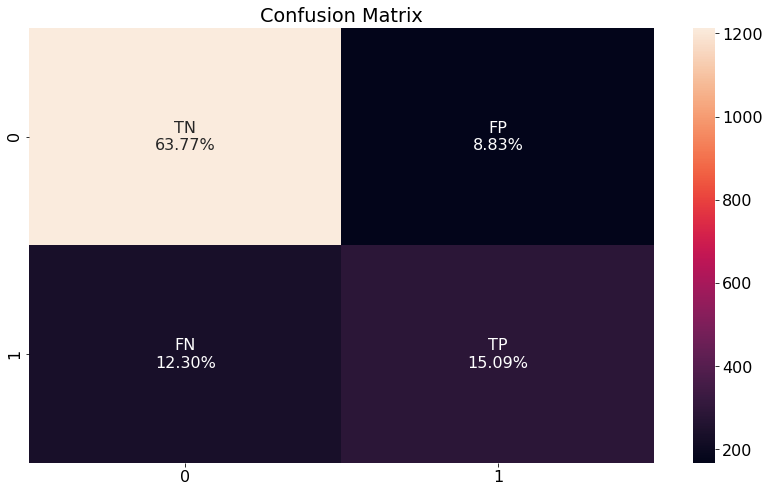

In [353]:
y_pred = model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

names =  ['TN', 'FP', 'FN','TP']
perc = ["{0:.2%}".format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(names, perc)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 16})
sns.heatmap(cf, annot=labels, fmt='').set_title("Confusion Matrix");



---

---

## Ideas for customer retention programs:


Improve customer satisfaction, A satisfactory interaction with your company undoubtedly creates a great impression and experience that encourages customers to retain with your business.  
Learn about your customer experience with your products and services, Listen to them and identify their needs.
You can collect customer feedback to know whether your customers are satisfied or not. Accordingly, you can improve the support process and exceed customer expectations.


---

---











# Conclusion:


We have implemented of Logistic Regression model and we obtained the following:
- ```1500``` of our predicted equal to ```y_test```.

- When we predicted with 10 features we achieved  ```0.23``` on our data


- In cross validation  we have : ```[0.77477477, 0.80855856, 0.82882883, 0.79504505, 0.82882883,0.80405405, 0.81715576, 0.79458239, 0.80361174, 0.79232506]```





- From the GridSearchCV we obtained best parameters in:
```{'logisticregression__fit_intercept': False, 'logisticregression__solver': 'liblinear'}```.

- We obtained the Accuracy that equals ```78.86%``` approximately.

- Best score is: ```80.57%``` approximately.



---

---









# Resoucres:
- [Logistic Regression](https://www.sciencedirect.com/topics/medicine-and-dentistry/logistic-regression-analysis)
